In [1]:
# example of plotting the adam search on a contour plot of the test function
from math import sqrt,cos,log,exp
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
import numpy as np

A = 2
B = 4

gamma = 1

# objective function
def objective(x, y):
    return x**A + 10*y**B
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * A, 10*y * B])
 
# gradient descent algorithm with adam
def lion(objective, derivative, bounds, n_iter, alpha, beta1=0.9, beta2=0.99, wd=0.001):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    print(x)
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta2 * m[i] + (1.0 - beta2) * g[i]
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            # x[i] = x[i] - alpha * (np.tanh(beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            x[i] = x[i] - alpha * (np.sign(beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            # x[i] = x[i] - alpha * ((beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
        alpha = alpha*(gamma)**t
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
        # print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    return solutions

# gradient descent algorithm with adam
def sgd(objective, derivative, bounds, n_iter, alpha, beta1=0.9, beta2=0.99, wd=0.001):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    print(x)
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta2 * m[i] + (1.0 - beta2) * g[i]
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            # x[i] = x[i] - alpha * (np.sign(beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            # x[i] = x[i] - alpha * ((beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            x[i] = x[i] - alpha * (m[i] + wd*x[i])
        alpha = alpha*(gamma)**t
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
    print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    return solutions

# gradient descent algorithm with adam
def signum(objective, derivative, bounds, n_iter, alpha, beta1=0.9, beta2=0.99, wd=0.001):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    print(x)
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            # x[i] = x[i] - alpha * (np.tanh(beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            # x[i] = x[i] - alpha * (np.sign(beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            # x[i] = x[i] - alpha * ((beta1 * m[i] + (1.0 - beta1) * g[i]) + wd*x[i])
            x[i] = x[i] - alpha * np.sign(m[i])
            # x[i] = x[i] - alpha * g[i]
        alpha = alpha*(gamma)**t
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
        # print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    return solutions
 
 
 # gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    print(x)
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # keep track of solutions
        solutions.append(x.copy())
        alpha = alpha*(gamma)**t
        # report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))
    print(f'>{t} f({x}) = {score}.5f,      lr={alpha}')
    return solutions

In [2]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 200
# steps size
alpha = 0.09
# factor for average gradient
beta1 = 0.99
# factor for average squared gradient
beta2 = 0.999

[-0.99977125 -0.39533485]
>199 f([ 0.02303199 -0.04655157]) = 0.0005774336114630981.5f,      lr=0.09


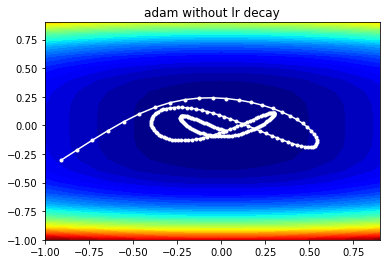

In [4]:
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.title('adam without lr decay')
# show the plot
pyplot.show()

[-0.70648822 -0.81532281]
>199 f([ 0.01352712 -0.09532485]) = 0.0010086871470249721.5f,      lr=0.09


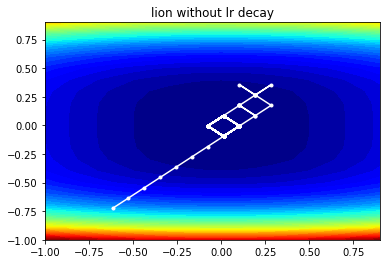

In [5]:
# perform the gradient descent search with adam
solutions = lion(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.title('lion without lr decay')
# show the plot
pyplot.show()

[-0.62747958 -0.30887855]
>199 f([ 0.49759976 -0.23772875]) = 0.2795449273175192.5f,      lr=0.09


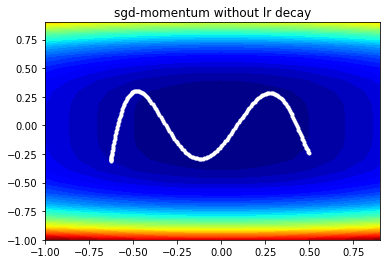

In [6]:
# perform the gradient descent search with adam
solutions = sgd(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.title('sgd-momentum without lr decay')
# show the plot
pyplot.show()

[-0.20646505  0.07763347]
>199 f([ 0.15353495 -0.10236653]) = 0.024671055291416454.5f,      lr=0.09


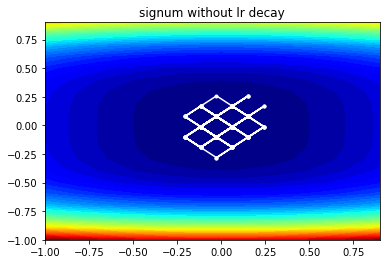

In [7]:
# perform the gradient descent search with adam
solutions = signum(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.title('signum without lr decay')
# show the plot
pyplot.show()